## Question - 2

In [1]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt
import time
import sys

def get_ans(N, max_vis_N = 5):
  start = time.time()
  fibs = [1,1]
  last = fibs[-1]
  while last < N:
    last = fibs[-1] + fibs[-2]
    fibs.append(last)

  fibs = fibs[1:] # remove duplicated 1 from fibbonacci
  limit = fibs[-1]

  graph = []
  numbers = list(range(limit+1))

  # add nodes
  for number in numbers:
    graph.append([])

  # nx_edges = []

  # add edges
  for number in numbers:
    for fib in fibs:
      if fib + number <= limit:
        graph[number].append(number + fib)
        # nx_edges.append([number, number + fib])
      if number - fib >= 0:
        graph[number].append(number - fib)
        # nx_edges.append([number, number - fib])

  # if N <= max_vis_N:
  #   G = nx.Graph()
  #   G.add_edges_from(nx_edges)
  #   nx.draw_networkx(G)

  # show graph only for small number

  # do a bfs
  vis = [-1 for e in range(limit+1)]
  parent = [-1 for e in range(limit + 1)]

  queue = deque()
  queue.append(0)
  vis[0] = 0
  parent[0] = 0

  while len(queue) > 0:
    u = queue.popleft()
    for v in graph[u]:
      if vis[v] != -1:
        continue
      vis[v] = vis[u] + 1
      parent[v] = u
      queue.append(v)

  # shortest path from N to 0
  res = []
  cur = N
  while cur != 0:
    res.append(cur - parent[cur])
    cur = parent[cur]
  return res, vis[0], time.time() - start

plt.rcParams["figure.figsize"] = (18, 8)
e = 12
ans = get_ans(e, -1)
print(f"{e}: length={ans[1]}: elements={ans[0]}, time={ans[2]}s")

12: length=0: elements=[-1, 13], time=6.651878356933594e-05s


## Question - 3

False

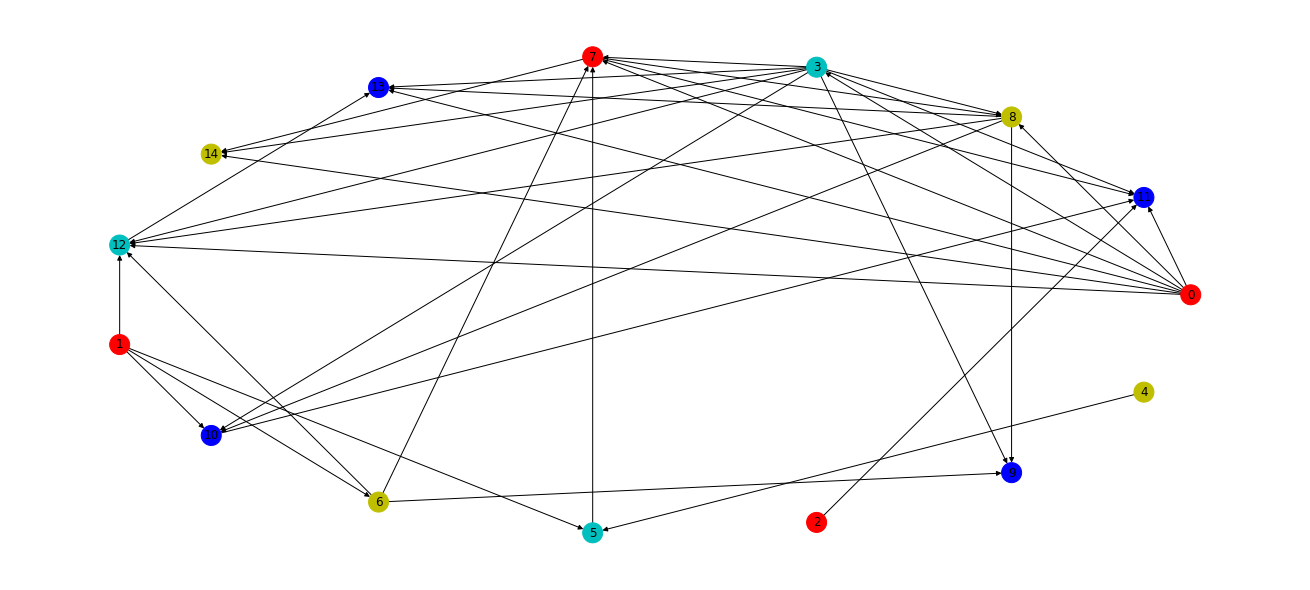

In [2]:
sys.setrecursionlimit(100000)

# generate random graph for testing
import numpy as np
import random

def generate_dag(N, max_degree):
    return [
     [f for f in np.random.choice(N, random.randint(0, max_degree), replace=False) if f > e] 
     for e in range(N)]

N = 15
graph = generate_dag(N, 10)
# graph = [
#     [2, 3, 5,7],
#     [2, 3],
#     [4],
#     [4],
#     [],
#     [6],
#     [],
#     [8],
#     []
# ]

# display graph
G = nx.DiGraph()
for u in range(len(graph)):
  G.add_node(u)
  for v in graph[u]:
    G.add_node(v)
    G.add_edge(u, v)

colors = ['r','b','y','c']*(N//4 + 1)
nx.draw_circular(G, with_labels=True, node_size=400, node_color=colors[:N])

## do dfs
# pre-processing: do dfs
reachable_nodes = [{e} for e in range(len(graph))]
vis = [0] * len(graph)

def dfs(u):
  if vis[u]:
    return
  vis[u] = 1
  for v in graph[u]:
    dfs(v)
    reachable_nodes[u] |= reachable_nodes[v]

for e in range(len(graph)):
  dfs(e)


# to test whether 6 is dependant on 3
6 in reachable_nodes[3]

## Question: 1

In [1]:
# A Binary Tree Node
from collections import deque

class TreeStringParser:
  def __init__(self, input: str):
    self.parsed = list()
    for idx, ch in enumerate(input):
      if idx % 2:
        self.parsed[-1].append(int(ch))
      else:
        self.parsed.append([int(ch)])

class Node:
    def __init__(self, data=None, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right

class BinaryTree:

  def __init__(self, input_stream):
    self.input_stream = input_stream
    self.current_node_index = 0
    self.root = self.build_tree()

  def build_tree(self):
    self.current_node_index += 1
    node = Node(self.current_node_index)
    encoded_node = self.input_stream[self.current_node_index - 1]
    has_left, has_right = encoded_node
    
    if has_left:
      node.left = self.build_tree()
    if has_right:
      node.right = self.build_tree()
    return node

  def print(self):
    self.print_node(self.root)

  def print_node(self, node, cur="", left=True):
    if not node:
      return
    cur_ = cur[:-1] + " "
    cur_sub = " " if not cur else cur
    self.print_node(node.right, (cur_sub if left else cur_) + "     |", False)
    print(f"""{cur[:-1] + "#"}----({node.data})""")
    self.print_node(node.left, (cur_sub if not left else cur_) + "     |", True)

  def get_traversal_with_stack(self, debug=False):
    stack = deque()
    stack.append(self.root)
    while len(stack):
      top = stack.pop()
      if debug:
        print(f"node={top.data}: [{top.left.data if top.left else '-'}, {top.right.data if top.right else '-'}]")
      yield top.data
      if top.right:
        stack.append(top.right)
      if top.left:
        stack.append(top.left)

  def get_preorder_efficient(self):
    cur = self.root
    while cur:
      if not cur.left:
        yield cur.data
        cur = cur.right
      else:
        prev = cur.left
        while prev.right not in (cur, None):
          prev = prev.right
        if prev.right is None:
          yield cur.data
          prev.right = cur
          cur = cur.left
        elif prev.right == cur:
          prev.right = None
          cur = cur.right

if __name__ == '__main__':
  string_input = "111011010011000001110010100100"
  input_stream = TreeStringParser(string_input).parsed

  tree = BinaryTree(input_stream)
  tree.print()
  print("\nStep-1: Pre-order traversal with stack:")
  print("\npreorder: ", list(tree.get_traversal_with_stack(debug=True)))
  
  print("\n\nStep-2: Pre-order traversal without extra space:")
  print(list(tree.get_preorder_efficient()))

  print("\n\nStep-3: Pre-order traversal with stack to verify:")
  print("preorder: ", list(tree.get_traversal_with_stack()))

  print("\n\n")
  tree.print()

                  #----(12)
                  |     #----(13)
                  |           |     #----(15)
                  |           #----(14)
            #----(10)
            |     #----(11)
      #----(9)
#----(1)
      #----(2)
            |           #----(8)
            |     #----(6)
            |     |     #----(7)
            #----(3)
                  |     #----(5)
                  #----(4)

Step-1: Pre-order traversal with stack:
node=1: [2, 9]
node=2: [3, -]
node=3: [4, 6]
node=4: [-, 5]
node=5: [-, -]
node=6: [7, 8]
node=7: [-, -]
node=8: [-, -]
node=9: [-, 10]
node=10: [11, 12]
node=11: [-, -]
node=12: [13, -]
node=13: [14, -]
node=14: [-, 15]
node=15: [-, -]

preorder:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


Step-2: Pre-order traversal without extra space:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


Step-3: Pre-order traversal with stack to verify:
preorder:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]



                  #----(12

In [8]:
print("\n\n")
r = tree.root

In [58]:
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.left = Node(6)
root.right.right = Node(7)

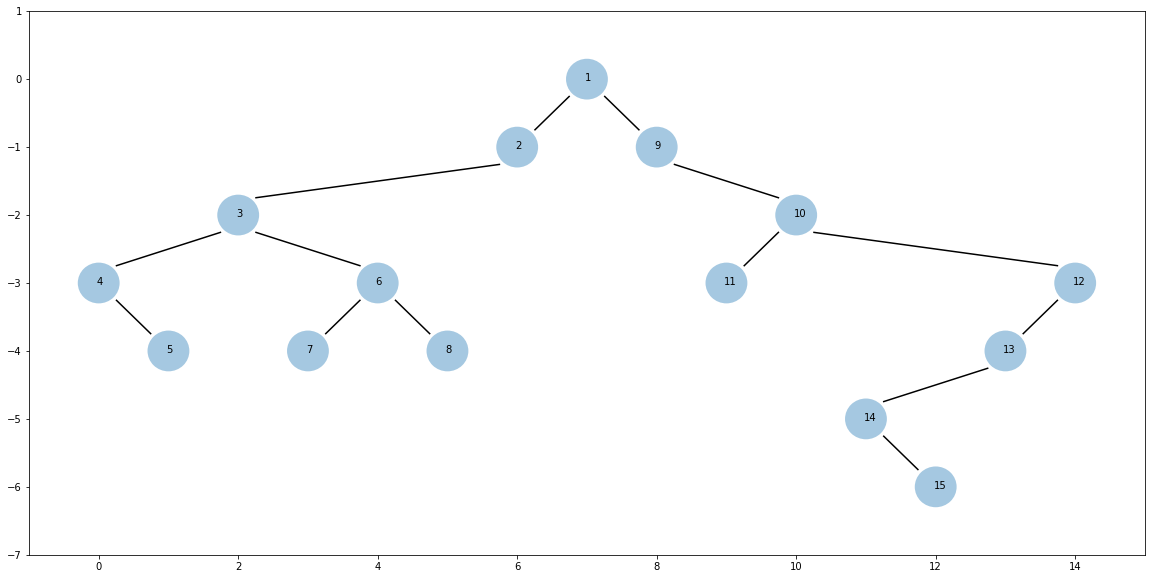

In [85]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

def print_tree(root):
  pos = dict()
  edges = []

  def set_index(node, pos, edges, cur = 0, depth = 0):
    if node == None:
      return cur
    cur = set_index(node.left, pos, edges,  cur, depth + 1)
    if node.left:
      edges.append([node.data, node.left.data])
    if node.right:
      edges.append([node.data, node.right.data])
    pos[node.data] = (cur, -depth)
    cur += 1
    cur = set_index(node.right, pos, edges, cur, depth + 1)
    return cur

  set_index(root, pos, edges)

  # figure, axes = plt.subplots()
  # axes.set_aspect( 1 )
  
  max_depth = max([-e[1] for e in pos.values()])
  x_scale =  (2 + max_depth) / (len(pos) + 1)
  plt.rcParams["figure.figsize"] = (20,20 * x_scale)

  fig, ax = plt.subplots()
  ax.set_xlim((-1, len(pos)))
  ax.set_ylim((-max_depth - 1, 1))


  patches = []

  circle_radius = 0.3

  for edge in edges:
    u, v = edge[0], edge[1]
    pos_u, pos_v = pos[u], pos[v]
    x1, y1 = [pos_u[0], pos_u[1]]
    x2, y2 = [pos_v[0], pos_v[1]]
    if x1 < x2:
      x1 += circle_radius * 0.85
      x2 -= circle_radius * 0.85
    if x2 < x1:
      x1 -= circle_radius * 0.85
      x2 += circle_radius * 0.85

    if y1 < y2:
      y1 += circle_radius * 0.85
      y2 -= circle_radius * 0.85
    if y2 < y1:
      y1 -= circle_radius * 0.85
      y2 += circle_radius * 0.85

    plt.plot((x1, x2),(y1, y2) , color = "black")


  for data, posn in pos.items():
    patches.append(Circle(posn, circle_radius))
    ax.annotate(str(data),xy=(posn[0] - 0.03, posn[1] - 0.03))

  p = PatchCollection(patches, alpha=0.4)
  ax.add_collection(p)
  # fig.colorbar(p, ax=ax)
  plt.show()

print_tree(tree.root)